Реализую модель линейной регрессии вручную без библиотек( разве что numpy). Начну с простой функции, далее оберну всё в класс и т.д

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Для начала задам точки в диапозоне,а также добавлю шум

In [94]:
x = np.random.uniform(0, 10, 101)
noise = np.random.normal(0, 2, 101)
y = 2*x + 3 + noise

In [96]:
def linear(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    w = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - w * x_mean

    n = len(y)
    y_pred = w * x + b
    MSE = np.mean((y - y_pred)**2)
    
    return w, b, MSE

In [98]:
w, b, MSE = linear(x,y)
y_pred = w * x + b

In [100]:
linear(x,y)

(1.9443799191476443, 3.237685963446662, 4.556170294520755)

прямая, очевидно, хорошо ложится на данные

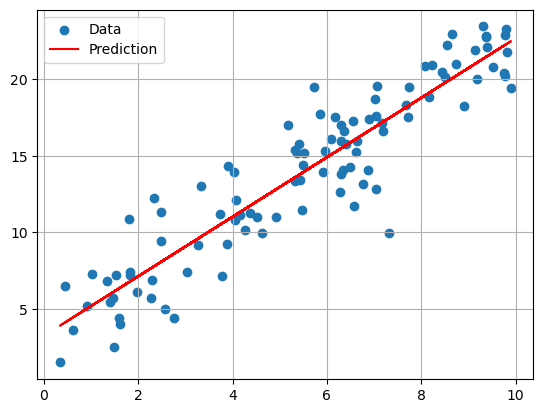

In [103]:
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color='red', label="Prediction")
plt.legend()
plt.grid()
plt.show()

In [105]:
class LinearRegression():
    def __init__(self):
        self.w = None
        self.b = None
        self.x_mean = None
        self.y_mean = None
        self.y_pred = None
        
    def fit_least_squares(self, x, y):
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        self.w = np.sum((x - self.x_mean) * (y - self.y_mean)) / np.sum((x - self.x_mean)**2)
        self.b = self.y_mean - self.w * self.x_mean
        return self.w, self.b

    def polynom_features(self, x, degree):
        X = np.column_stack([x**i for i in range(degree+1)])
        return X       
    def predict(self, x):
        self.y_pred = self.w * x + self.b
        return self.y_pred
        
    def mse(self, y):
        self.MSE = np.mean((y - self.y_pred)**2)
        return self.MSE

In [107]:
model = LinearRegression()

In [109]:
w, b = model.fit_least_squares(x, y)
w, b

(1.9443799191476443, 3.237685963446662)

ошибка = 4.556170294520755


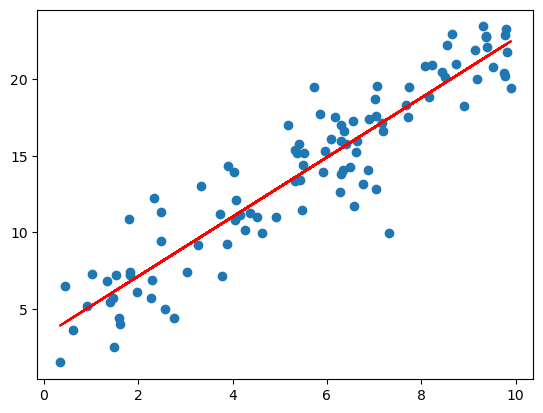

In [115]:
model.fit_least_squares(x, y)
y_pred = model.predict(x)
mse_value = model.mse(y)
print(f'ошибка = {mse_value}')

plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color='red', label="Prediction")

plt.show() 

Теперь реализую класс для полиномиальной регрессии, а далее протестирую всё на более интересных данных

In [17]:
class PolynomialRegression():
    def __init__(self):
        self.w = None
        self.y_pred = None
    def polynom_features(self, x, degree):
        X = np.column_stack([x**i for i in range(degree+1)])
        return X

    def fit(self, x, y, degree):
        X = self.polynom_features(x, degree)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        return self.w
        
    def predict(self, x, degree):
        X = self.polynom_features(x, degree) 
        self.y_pred = X @ self.w
        return self.y_pred
        
    def mse(self, y, y_pred):
        self.MSE = np.mean((y - self.y_pred)**2)
        return self.MSE

In [18]:
x = np.array([1, 2, 3])
degree = 4
X = model.polynom_features(x, degree)
X

array([[ 1,  1,  1,  1,  1],
       [ 1,  2,  4,  8, 16],
       [ 1,  3,  9, 27, 81]])

Потестирую модель на разных данных, посмотрю насколько хорошо она аппроксимирует 

In [20]:
x = np.linspace(-3, 3, 50)
y = x**2 + np.random.randn(50)*2

In [21]:
polynom_model = PolynomialRegression()

 степень = 1, ошибка = 8.762423442947743
 степень = 2, ошибка = 3.341210442284728
 степень = 3, ошибка = 3.303650083155809
 степень = 5, ошибка = 3.2409782819177697
 степень = 7, ошибка = 3.1826556531592938


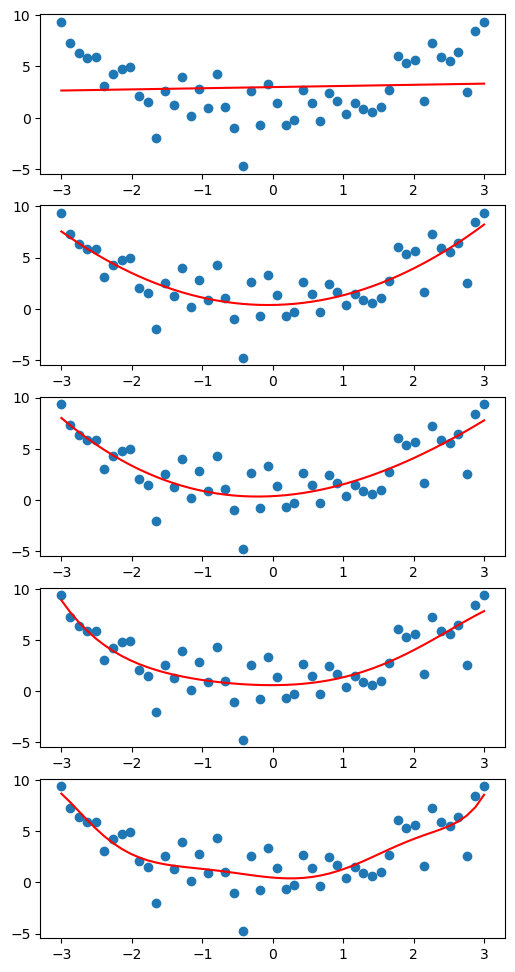

In [22]:

degrees = [1, 2, 3, 5, 7]
fig, axes = plt.subplots(len(degrees), 1, figsize=(6, 12))

for i, degree in enumerate(degrees):
    polynom_model.fit(x, y, degree)
    y_pred = polynom_model.predict(x, degree)
    mse_value = polynom_model.mse(y, y_pred)
    print(f' степень = {degree}, ошибка = {mse_value}')
    
    axes[i].scatter(x, y, label="Data")
    axes[i].plot(x, y_pred, color='red', label="Prediction")

plt.show()

Как видно из графиков, модель хорошо аппроксимирует данные. Чем больше степень полинома, тем сильнее модель подстраивается под данные. MSE закономерно снижается, но это ведет к снижению обобщающей способности модели

Хочу добавить градиентый спуск в класс линейной регрессии и сравню с методом наименьших квадратов

In [25]:
class PolynomialRegression_gd():
    def __init__(self, lr=0.0001, n_iter=1000):
        self.w = None
        self.y_pred = None
        self.lr = lr
        self.n_iter = n_iter
    def polynom_features(self, x, degree):
        X = np.column_stack([x**i for i in range(degree+1)])
        return X
        
    def fit_gd(self, x, y, degree, n_iter): # переделаю для реализации градиентного спуска
        X = self.polynom_features(x, degree)
        self.w = np.random.randn(X.shape[1])
        for i in range(self.n_iter):
            self.y_pred = X @ self.w
            error = (X.T @ (self.y_pred - y)) / len(y)
            self.w = self.w - self.lr * error
        return self.w            
    def predict(self, x, degree):
        X = self.polynom_features(x, degree) 
        self.y_pred = X @ self.w
        return self.y_pred
        
    def mse(self, y, y_pred):
        self.MSE = np.mean((y - self.y_pred)**2)
        return self.MSE

In [26]:
x = np.linspace(-3, 3, 50)
y = x**2 + np.random.randn(50)*2

In [27]:
polynom_model_gd = PolynomialRegression_gd()

 степень = 1, ошибка = 18.456174398764738
 степень = 2, ошибка = 2.54584614224589
 степень = 3, ошибка = 5.250103530360982
 степень = 5, ошибка = 4.204541164831403
 степень = 7, ошибка = nan


C:\Users\User\AppData\Local\Temp\ipykernel_5996\2122650926.py:16: RuntimeWarning: overflow encountered in matmul
  error = (X.T @ (self.y_pred - y)) / len(y)
C:\Users\User\AppData\Local\Temp\ipykernel_5996\2122650926.py:16: RuntimeWarning: invalid value encountered in matmul
  error = (X.T @ (self.y_pred - y)) / len(y)
C:\Users\User\AppData\Local\Temp\ipykernel_5996\2122650926.py:17: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.lr * error


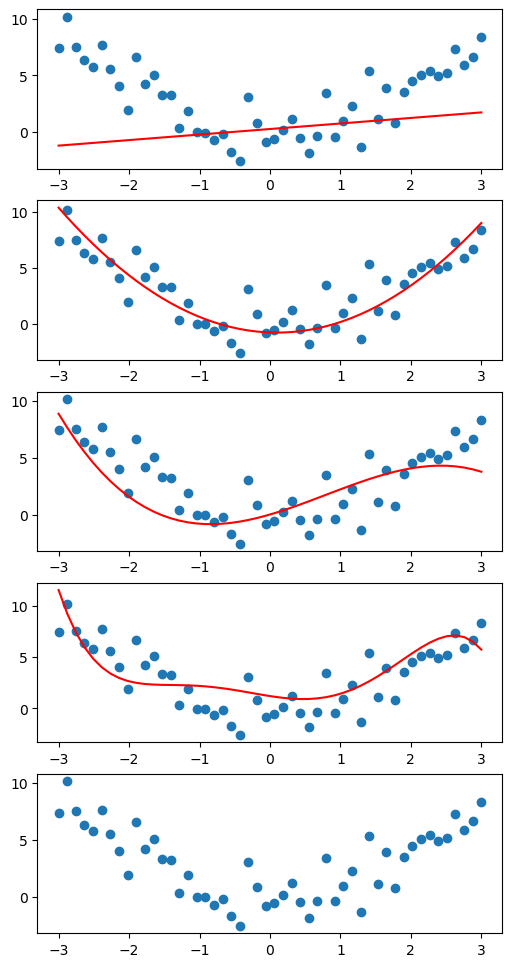

In [75]:
degrees = [1, 2, 3, 5, 7]
fig, axes = plt.subplots(len(degrees), 1, figsize=(6, 12))
n_iter = 100
for i, degree in enumerate(degrees):
    polynom_model_gd.fit_gd(x, y, degree, n_iter)
    y_pred = polynom_model_gd.predict(x, degree)
    mse_value = polynom_model_gd.mse(y, y_pred)
    print(f' степень = {degree}, ошибка = {mse_value}')
    
    axes[i].scatter(x, y, label="Data")
    axes[i].plot(x, y_pred, color='red', label="Prediction")
    
plt.show()

Здесь можно пронаблюдать так называемый "взрыв весов". ошибка растёт - перепрыгиваем точку минимума, градиенты увеличиваются. Построю график, чтобы увидеть что происходит при обучении, а после попыватюсь исправить ситуацию добавлением регуляризации 

In [30]:
class PolynomialRegression_gd_reg():
    def __init__(self, lr=0.01, n_iter=1000, reg_lambda=0.01):
        self.w = None
        self.y_pred = None
        self.lr = lr
        self.n_iter = n_iter
        self.reg_lambda = reg_lambda
    def polynom_features(self, x, degree):
        X = np.column_stack([x**i for i in range(degree+1)])
        X[:,1:] = (X[:,1:] - X[:,1:].mean(axis=0)) / X[:,1:].std(axis=0) # по сути это формула: x_norm = (x - np.mean(x)) / np.std(x), (срезом убираем нормализацию константного столбца)
        return X
        
    def fit_gd(self, x, y, degree): 
        X = self.polynom_features(x, degree)
        self.w = np.random.randn(X.shape[1])* 0.01 # иницилизирую веса ммаленькими числами
        for i in range(self.n_iter):
            w_reg = self.w.copy()
            w_reg[0] = 0 # это bias(регуляризация не нужна)
            self.y_pred = X @ self.w
            gradient = (X.T @ (self.y_pred - y)) / len(y) +  2*self.reg_lambda* w_reg 
            self.w = self.w - self.lr * gradient
        return self.w            
    def predict(self, x, degree):
        X = self.polynom_features(x, degree) 
        self.y_pred = X @ self.w
        return self.y_pred
        
    def mse(self, y, y_pred):
        self.MSE = np.mean((y - self.y_pred)**2) 
        return self.MSE

In [31]:
polynom_model_gd_reg = PolynomialRegression_gd_reg()

Простым добавлением регуляризации не удалось избавиться от "взрыва весов" поэтому добавил нормализацию иксов чтобы уменьшить диапозон значений после возведения в степень, а также иницилизировал веса маленькими значениями

 степень = 1, ошибка = 9.808088589171929
 степень = 2, ошибка = 2.2563783760296654
 степень = 3, ошибка = 2.251566992940166
 степень = 5, ошибка = 2.387700784414054
 степень = 7, ошибка = 2.314228114837456


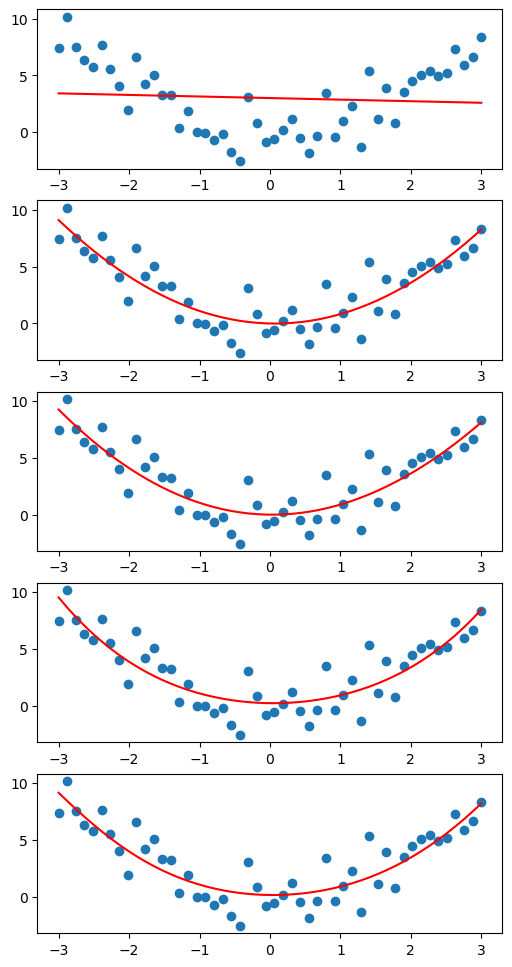

In [83]:
degrees = [1, 2, 3, 5, 7]
fig, axes = plt.subplots(len(degrees), 1, figsize=(6, 12))
for i, degree in enumerate(degrees):
    polynom_model_gd_reg.fit_gd(x, y, degree)
    y_pred = polynom_model_gd_reg.predict(x, degree)
    mse_value = polynom_model_gd_reg.mse(y, y_pred)
    print(f' степень = {degree}, ошибка = {mse_value}')
    axes[i].scatter(x, y, label="Data")
    axes[i].plot(x, y_pred, color='red', label="Prediction")
    
plt.show()

In [80]:
# как видно регуляризация  с нормализацией весов помогает избежать сильного роста веосов и переобучения модели 